In [316]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
from textblob import TextBlob
from loguru import logger
import matplotlib.dates as mdates
import click
import numpy as np
from matplotlib.ticker import MultipleLocator

In [317]:
import tomllib

configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)
config

{'raw': 'data/raw',
 'processed': 'data/processed',
 'input': '_chat.txt',
 'current': 'whatsapp-20250910-235500.parquet',
 'inputpath': 'your-path-here.csv',
 'datetime_format': '%d/%m/%Y, %H:%M:%S',
 'drop_authors': [],
 'logging': {'logdir': 'logs'}}

In [318]:
# Remove default logger and add console sink
logger.remove()
logger.add(sys.stderr, level="INFO")

# Get log directory from config
log_dir = Path(config["logging"]["logdir"]).resolve()
log_dir.mkdir(parents=True, exist_ok=True)  # ensure folder exists

# Build timestamped logfile path
# timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
# logfile = log_dir / f"logfile-{timestamp}.log"

logfile = log_dir / f"logfile.log"

# Add file sink
logger.add(
    logfile,
    rotation="10 MB",
    retention="30 days",
    compression="zip",
    level="DEBUG",
    enqueue=True
)

logger.info(f"Logging initialized, writing to {logfile}")

2025-09-21 22:03:13.180 | INFO     | __main__:<module>:25 - Logging initialized, writing to /Users/luiginocleofa/1_HU_Post_HBO_AI/DAV/MADS-DAV/notebooks/logs/logfile.log


In [319]:
datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
if not datafile.exists():
    logger.warning(
        "Datafile does not exist. First run src/preprocess.py, and check the timestamp!"
    )

In [320]:
datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
if not datafile.exists():
    logger.warning(
        "Datafile does not exist. First run src/preprocess.py, and check the timestamp!"
    )

In [321]:
df = pd.read_parquet(datafile)

In [322]:
# Ensure timestamp is datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])
# Optional: add hour and message length
df["hour"] = df["timestamp"].dt.hour
df["msg_length"] = df["message"].str.len()
# df.dtypes

In [323]:
# # --- Step 1: Compute sentiment per message for all keywords ---
# def compute_keyword_sentiment(df, keywords):
#     df = df.copy()
#     df["timestamp"] = pd.to_datetime(df["timestamp"])
#     df["sentiment"] = df["message"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
#     for kw in keywords:
#         df[kw] = df.apply(lambda row: row["sentiment"] if kw.lower() in str(row["message"]).lower() else np.nan, axis=1)
#     return df[["timestamp"] + keywords]

In [324]:
# # --- Step 2: Resample monthly to get mean sentiment per keyword ---
# def resample_monthly_sentiment(df_keywords):
#     df_keywords = df_keywords.set_index("timestamp")
#     monthly_sentiment = df_keywords.resample("ME").mean()
#     return monthly_sentiment

In [325]:
# # --- Step 3: Filter months where both keywords appear ---
# def filter_cooccurring_months(monthly_sentiment, keywords):
#     filtered = monthly_sentiment.dropna(subset=keywords)

#     logger.debug(f"First 20 messages for '{filtered}':\n{filtered.head(20).to_string()}")

#     return filtered

In [326]:
# # --- Step 4: Plot co-occurring keyword trends with general regression ---
# def plot_cooccurring_keywords_with_general_trend(monthly_sentiment, keywords):
#     plt.figure(figsize=(12, 6))

#     all_trends = []

#     for kw in keywords:
#         plt.plot(monthly_sentiment.index, monthly_sentiment[kw], marker="o", label=kw)
#         all_trends.append(monthly_sentiment[kw])

#     # Compute general trend (mean of all keywords per month)
#     general_trend = pd.concat(all_trends, axis=1).mean(axis=1).dropna()

#     if not general_trend.empty:
#         x = np.arange(len(general_trend))
#         coeffs = np.polyfit(x, general_trend.values, 1)
#         y_fit = np.polyval(coeffs, x)
#         plt.plot(general_trend.index, y_fit, color="red", linestyle="--", linewidth=2, label="Algemene trend (regressie)")

#     plt.axhline(y=0, color="black", linestyle="--", label="Neutral sentiment")
#     plt.xlabel("Datum")
#     plt.ylabel("Gemiddeld sentiment (-1 tot +1)")
#     plt.title(f"Sentiment trends for co-occurring keywords: {', '.join(keywords)}")
#     plt.xticks(rotation=45)
#     plt.legend()
    
#     ax = plt.gca()
#     ax.yaxis.set_major_locator(MultipleLocator(0.02))
#     plt.tight_layout()
#     plt.show()

In [327]:
# # --- Step 1: Compute sentiment per message for all keywords ---
# def compute_keyword_sentiment(df, keywords):
#     df = df.copy()
#     df["timestamp"] = pd.to_datetime(df["timestamp"])
#     df["sentiment"] = df["message"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
#     for kw in keywords:
#         df[kw] = df.apply(lambda row: row["sentiment"] if kw.lower() in str(row["message"]).lower() else np.nan, axis=1)
#     return df[["timestamp"] + keywords]

# # --- Step 2: Resample monthly to get mean sentiment per keyword ---
# def resample_monthly_sentiment(df_keywords):
#     df_keywords = df_keywords.set_index("timestamp")
#     monthly_sentiment = df_keywords.resample("ME").mean()
#     return monthly_sentiment

# # --- Step 3: Filter months where both keywords appear ---
# def filter_cooccurring_months(monthly_sentiment, keywords):
#     filtered = monthly_sentiment.dropna(subset=keywords)
#     return filtered

# # --- Step 4: Plot co-occurring keyword trends with general regression ---
# def plot_cooccurring_keywords_with_general_trend(monthly_sentiment, keywords):
#     plt.figure(figsize=(12, 6))

#     all_trends = []

#     for kw in keywords:
#         plt.plot(monthly_sentiment.index, monthly_sentiment[kw], marker="o", label=kw)
#         all_trends.append(monthly_sentiment[kw])

#     # Compute general trend (mean of all keywords per month)
#     general_trend = pd.concat(all_trends, axis=1).mean(axis=1).dropna()

#     if not general_trend.empty:
#         x = np.arange(len(general_trend))
#         coeffs = np.polyfit(x, general_trend.values, 1)
#         y_fit = np.polyval(coeffs, x)
#         plt.plot(general_trend.index, y_fit, color="red", linestyle="--", linewidth=2, label="Algemene trend (regressie)")

#     plt.axhline(y=0, color="black", linestyle="--", label="Neutral sentiment")
#     plt.xlabel("Datum")
#     plt.ylabel("Gemiddeld sentiment (-1 tot +1)")
#     plt.title(f"Sentiment trends for co-occurring keywords: {', '.join(keywords)}")
#     plt.xticks(rotation=45)
#     plt.legend()
    
#     ax = plt.gca()
#     ax.yaxis.set_major_locator(MultipleLocator(0.02))
#     plt.tight_layout()
#     plt.show()


2025-09-21 22:03:14.514 | INFO     | __main__:get_cooccurring_messages:42 - Logging cooccurring_messages                      timestamp  \
728  2023-10-02 20:48:12+00:00   
767  2023-10-07 18:21:29+00:00   
1610 2024-05-10 11:16:40+00:00   
2096 2024-07-05 10:57:46+00:00   
2145 2024-07-17 17:44:58+00:00   
2260 2024-07-26 12:05:35+00:00   
2324 2024-08-06 12:08:04+00:00   

                                                message  sentiment  
728   Veel dank voor schoonmaken betonspetters! Het ...    0.00000  
767     Dankjewel Joan, dat jij het hebt schoongemaakt.    0.00000  
1610                    Bedankt voor de schoonmaak Henk    0.00000  
2096  Hi Martin, dat zijn onze stukadoors geweest. E...    0.00000  
2145  Vandaag de box gedeeltijk schoongemaakt,ook bi...    0.00000  
2260  De vloeren van de berging zien er weer tip top...    0.78125  
2324  Dank allemaal voor jullie geduld en begrip! Na...    0.00000  


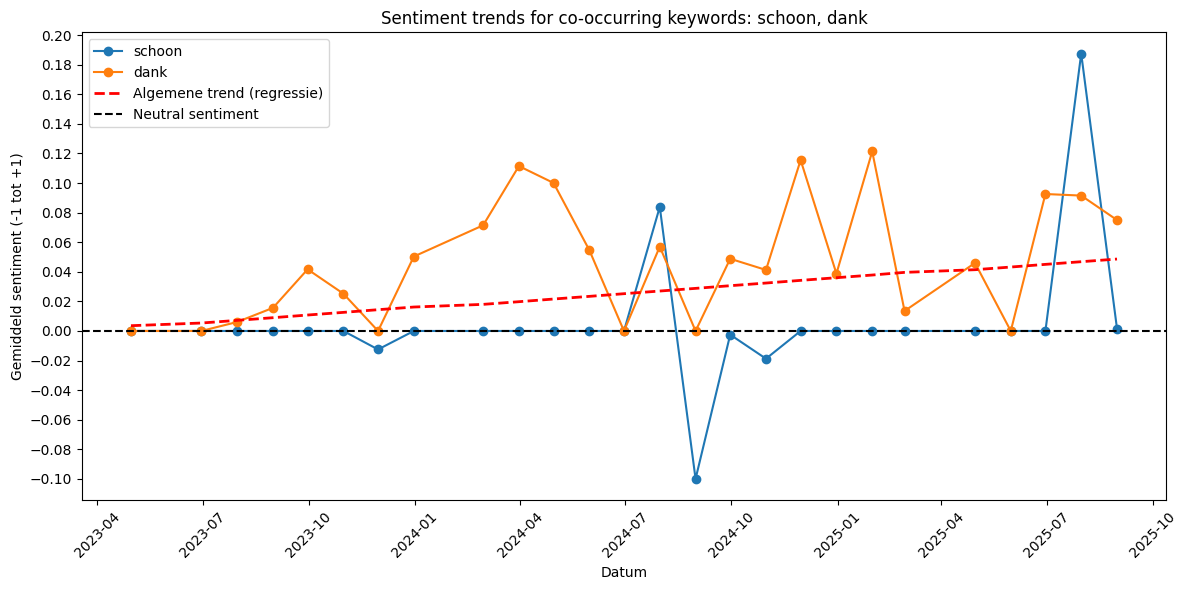

                     timestamp  \
728  2023-10-02 20:48:12+00:00   
767  2023-10-07 18:21:29+00:00   
1610 2024-05-10 11:16:40+00:00   
2096 2024-07-05 10:57:46+00:00   
2145 2024-07-17 17:44:58+00:00   
2260 2024-07-26 12:05:35+00:00   
2324 2024-08-06 12:08:04+00:00   

                                                message  sentiment  
728   Veel dank voor schoonmaken betonspetters! Het ...    0.00000  
767     Dankjewel Joan, dat jij het hebt schoongemaakt.    0.00000  
1610                    Bedankt voor de schoonmaak Henk    0.00000  
2096  Hi Martin, dat zijn onze stukadoors geweest. E...    0.00000  
2145  Vandaag de box gedeeltijk schoongemaakt,ook bi...    0.00000  
2260  De vloeren van de berging zien er weer tip top...    0.78125  
2324  Dank allemaal voor jullie geduld en begrip! Na...    0.00000  


In [328]:
# import pandas as pd
# from textblob import TextBlob
# import matplotlib.pyplot as plt
# from matplotlib.ticker import MultipleLocator
# import numpy as np

# --- Step 1: Compute sentiment per message for all keywords ---
def compute_keyword_sentiment(df, keywords):
    df = df.copy()
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df["sentiment"] = df["message"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    for kw in keywords:
        df[kw] = df.apply(lambda row: row["sentiment"] if kw.lower() in str(row["message"]).lower() else np.nan, axis=1)
    return df[["timestamp", "message"] + keywords + ["sentiment"]]

# --- Step 2: Resample monthly to get mean sentiment per keyword ---
# def resample_monthly_sentiment(df_keywords, keywords):
#     df_keywords = df_keywords.set_index("timestamp")
#     monthly_sentiment = df_keywords.resample("ME").mean()[keywords]
#     return monthly_sentiment

def resample_monthly_sentiment(df_keywords, keywords):
    df_keywords = df_keywords.set_index("timestamp")
    # Keep only keyword columns (numeric) for resampling
    monthly_sentiment = df_keywords[keywords].resample("ME").mean()
    return monthly_sentiment


# --- Step 3: Filter months where both keywords appear ---
def filter_cooccurring_months(monthly_sentiment, keywords):
    filtered = monthly_sentiment.dropna(subset=keywords)
    logger.debug(f"First 200 messages for '{filtered}':\n{filtered.head(200).to_string()}")
    return filtered

# --- Step 4: Get actual messages where all keywords co-occur ---
def get_cooccurring_messages(df, keywords):
    """
    Returns messages where all keywords are present in the same message.
    """
    mask = df[keywords].notna().all(axis=1)  # True only if all keywords have a sentiment
    df_cooccurring_messages = df.loc[mask, ["timestamp", "message", "sentiment"]].copy()
    logger.info(f"Logging cooccurring_messages {df_cooccurring_messages}")
    return cooccurring_messages

# --- Step 5: Plot co-occurring keyword trends with general regression ---
def plot_cooccurring_keywords_with_general_trend(monthly_sentiment, keywords):
    plt.figure(figsize=(12, 6))

    all_trends = []

    for kw in keywords:
        plt.plot(monthly_sentiment.index, monthly_sentiment[kw], marker="o", label=kw)
        all_trends.append(monthly_sentiment[kw])

    # Compute general trend (mean of all keywords per month)
    general_trend = pd.concat(all_trends, axis=1).mean(axis=1).dropna()

    if not general_trend.empty:
        x = np.arange(len(general_trend))
        coeffs = np.polyfit(x, general_trend.values, 1)
        y_fit = np.polyval(coeffs, x)
        plt.plot(general_trend.index, y_fit, color="red", linestyle="--", linewidth=2, label="Algemene trend (regressie)")

    plt.axhline(y=0, color="black", linestyle="--", label="Neutral sentiment")
    plt.xlabel("Datum")
    plt.ylabel("Gemiddeld sentiment (-1 tot +1)")
    plt.title(f"Sentiment trends for co-occurring keywords: {', '.join(keywords)}")
    plt.xticks(rotation=45)
    plt.legend()
    
    ax = plt.gca()
    ax.yaxis.set_major_locator(MultipleLocator(0.02))
    plt.tight_layout()
    plt.show()

# --- Example usage ---
keywords = ["schoon", "dank"]

# Step 1: Sentiment per message
df_keywords = compute_keyword_sentiment(df, keywords)

# Step 2: Monthly averages
monthly_sentiment = resample_monthly_sentiment(df_keywords, keywords)

# Step 3: Filter months where both keywords occur
cooccurring_months = filter_cooccurring_months(monthly_sentiment, keywords)

# Step 4: Get messages where both keywords co-occur
cooccurring_messages = get_cooccurring_messages(df_keywords, keywords)

# Step 5: Plot trends
plot_cooccurring_keywords_with_general_trend(cooccurring_months, keywords)

# Optional: view the messages
print(cooccurring_messages)


In [329]:
# # --- Step 1: Compute sentiment per message for all keywords ---
# def compute_keyword_sentiment(df, keywords):
#     df = df.copy()
#     df["timestamp"] = pd.to_datetime(df["timestamp"])
#     # Compute sentiment for each message
#     df["sentiment"] = df["message"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
#     # Add columns for each keyword with sentiment if keyword exists
#     for kw in keywords:
#         df[kw] = df.apply(lambda row: row["sentiment"] if kw.lower() in str(row["message"]).lower() else np.nan, axis=1)
#     return df[["timestamp", "message"] + keywords + ["sentiment"]]

# # --- Step 2: Resample monthly to get mean sentiment per keyword ---
# def resample_monthly_sentiment(df_keywords, keywords):
#     df_keywords = df_keywords.set_index("timestamp")
#     # Keep only numeric keyword columns for resampling
#     monthly_sentiment = df_keywords[keywords].resample("ME").mean()
#     return monthly_sentiment

# # --- Step 3: Filter months where both keywords appear ---
# def filter_cooccurring_months(monthly_sentiment, keywords):
#     filtered = monthly_sentiment.dropna(subset=keywords)
#     return filtered

# # --- Step 4: Get actual messages where all keywords co-occur ---
# def get_cooccurring_messages(df, keywords):
#     """
#     Returns messages where all keywords are present in the same message.
#     """
#     mask = df[keywords].notna().all(axis=1)
#     df_cooccurring_messages = df.loc[mask, ["timestamp", "message", "sentiment"]].copy()
#     return df_cooccurring_messages

# # --- Step 5: Plot co-occurring keyword trends with general regression ---
# def plot_cooccurring_keywords_with_general_trend(monthly_sentiment, keywords):
#     plt.figure(figsize=(12, 6))

#     all_trends = []

#     for kw in keywords:
#         plt.plot(monthly_sentiment.index, monthly_sentiment[kw], marker="o", label=kw)
#         all_trends.append(monthly_sentiment[kw])

#     # Compute general trend (mean of all keywords per month)
#     general_trend = pd.concat(all_trends, axis=1).mean(axis=1).dropna()

#     if not general_trend.empty:
#         x = np.arange(len(general_trend))
#         coeffs = np.polyfit(x, general_trend.values, 1)
#         y_fit = np.polyval(coeffs, x)
#         plt.plot(general_trend.index, y_fit, color="red", linestyle="--", linewidth=2, label="Algemene trend (regressie)")

#     plt.axhline(y=0, color="black", linestyle="--", label="Neutral sentiment")
#     plt.xlabel("Datum")
#     plt.ylabel("Gemiddeld sentiment (-1 tot +1)")
#     plt.title(f"Sentiment trends for co-occurring keywords: {', '.join(keywords)}")
#     plt.xticks(rotation=45)
#     plt.legend()
    
#     ax = plt.gca()
#     ax.yaxis.set_major_locator(MultipleLocator(0.02))
#     plt.tight_layout()
#     plt.show()

# # --- Example usage ---
# keywords = ["schoon", "dank"]

# # Step 1: Sentiment per message
# df_keywords = compute_keyword_sentiment(df, keywords)

# # Step 2: Monthly averages
# monthly_sentiment = resample_monthly_sentiment(df_keywords, keywords)

# # Step 3: Filter months where both keywords occur
# cooccurring_months = filter_cooccurring_months(monthly_sentiment, keywords)

# # Step 4: Get messages where both keywords co-occur
# cooccurring_messages = get_cooccurring_messages(df_keywords, keywords)

# # Step 5: Plot trends
# plot_cooccurring_keywords_with_general_trend(cooccurring_months, keywords)

# # --- Optional: view co-occurring messages ---
# print("All co-occurring messages:")
# print(cooccurring_messages)

# # --- Optional: view all negative sentiment messages ---
# negative_messages = cooccurring_messages[cooccurring_messages["sentiment"] < 0]
# print("\nAll negative sentiment messages where keywords co-occur:")
# print(negative_messages)

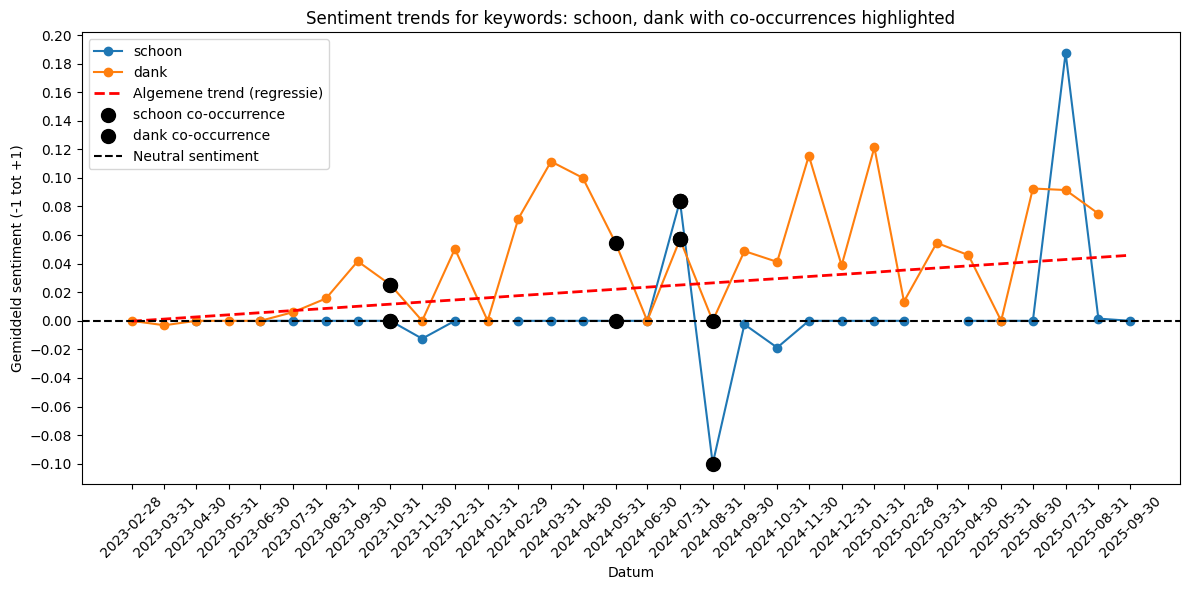

Co-occurring messages:
               timestamp                                            message  \
728  2023-10-02 20:48:12  Veel dank voor schoonmaken betonspetters! Het ...   
767  2023-10-07 18:21:29    Dankjewel Joan, dat jij het hebt schoongemaakt.   
1610 2024-05-10 11:16:40                    Bedankt voor de schoonmaak Henk   
2096 2024-07-05 10:57:46  Hi Martin, dat zijn onze stukadoors geweest. E...   
2145 2024-07-17 17:44:58  Vandaag de box gedeeltijk schoongemaakt,ook bi...   
2260 2024-07-26 12:05:35  De vloeren van de berging zien er weer tip top...   
2324 2024-08-06 12:08:04  Dank allemaal voor jullie geduld en begrip! Na...   

      sentiment  
728     0.00000  
767     0.00000  
1610    0.00000  
2096    0.00000  
2145    0.00000  
2260    0.78125  
2324    0.00000  


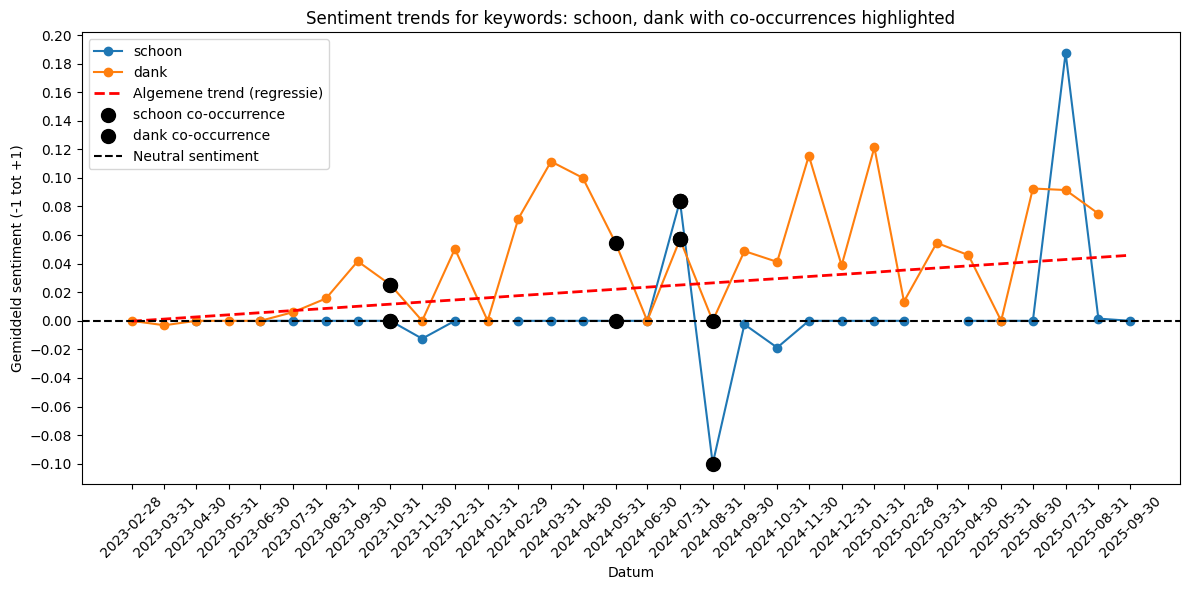

Co-occurring messages:
               timestamp                                            message  \
728  2023-10-02 20:48:12  Veel dank voor schoonmaken betonspetters! Het ...   
767  2023-10-07 18:21:29    Dankjewel Joan, dat jij het hebt schoongemaakt.   
1610 2024-05-10 11:16:40                    Bedankt voor de schoonmaak Henk   
2096 2024-07-05 10:57:46  Hi Martin, dat zijn onze stukadoors geweest. E...   
2145 2024-07-17 17:44:58  Vandaag de box gedeeltijk schoongemaakt,ook bi...   
2260 2024-07-26 12:05:35  De vloeren van de berging zien er weer tip top...   
2324 2024-08-06 12:08:04  Dank allemaal voor jullie geduld en begrip! Na...   

      sentiment  
728     0.00000  
767     0.00000  
1610    0.00000  
2096    0.00000  
2145    0.00000  
2260    0.78125  
2324    0.00000  


In [330]:
# --- Step 1: Compute sentiment per message for all keywords ---
def compute_keyword_sentiment(df, keywords):
    df = df.copy()
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df["sentiment"] = df["message"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    for kw in keywords:
        df[kw] = df.apply(lambda row: row["sentiment"] if kw.lower() in str(row["message"]).lower() else np.nan, axis=1)
    return df[["timestamp", "message"] + keywords + ["sentiment"]]

# --- Step 2: Resample monthly to get mean sentiment per keyword ---
def resample_monthly_sentiment(df_keywords, keywords):
    df_keywords = df_keywords.set_index("timestamp")
    monthly_sentiment = df_keywords[keywords].resample("ME").mean()
    return monthly_sentiment

# --- Step 3: Filter months where both keywords appear ---
def filter_cooccurring_months(monthly_sentiment, keywords):
    filtered = monthly_sentiment.dropna(subset=keywords)
    return filtered

# --- Step 4: Get actual messages where all keywords co-occur ---
def get_cooccurring_messages(df, keywords):
    mask = df[keywords].notna().all(axis=1)
    df_cooccurring_messages = df.loc[mask, ["timestamp", "message", "sentiment"]].copy()
    return df_cooccurring_messages

# def plot_cooccurring_keywords_with_highlights(monthly_sentiment, cooccurring_messages, keywords):
#     plt.figure(figsize=(12, 6))
#     all_trends = []

#     # Plot sentiment trends
#     for kw in keywords:
#         plt.plot(monthly_sentiment.index, monthly_sentiment[kw], marker="o", label=kw)
#         all_trends.append(monthly_sentiment[kw])

#     # General trend
#     general_trend = pd.concat(all_trends, axis=1).mean(axis=1).dropna()
#     if not general_trend.empty:
#         x = np.arange(len(general_trend))
#         coeffs = np.polyfit(x, general_trend.values, 1)
#         y_fit = np.polyval(coeffs, x)
#         plt.plot(general_trend.index, y_fit, color="red", linestyle="--", linewidth=2, label="Algemene trend (regressie)")

#     # Highlight months where co-occurring messages happened
#     # Map each message to the corresponding month-end in monthly_sentiment
#     cooccurring_month_ends = cooccurring_messages["timestamp"].dt.to_period("M").dt.to_timestamp("M")

#     for kw in keywords:
#         y_values = []
#         x_values = []
#         for month in cooccurring_month_ends:
#             if month in monthly_sentiment.index:
#                 x_values.append(month)
#                 y_values.append(monthly_sentiment.loc[month, kw])
#         plt.scatter(
#             x_values,
#             y_values,
#             color="black",
#             s=100,
#             zorder=5,
#             label=f"{kw} co-occurrence"
#         )

#     plt.axhline(y=0, color="black", linestyle="--", label="Neutral sentiment")
#     plt.xlabel("Datum")
#     plt.ylabel("Gemiddeld sentiment (-1 tot +1)")
#     plt.title(f"Sentiment trends for keywords: {', '.join(keywords)} with co-occurrences highlighted")
#     plt.xticks(rotation=45)
#     plt.legend()
#     ax = plt.gca()
#     ax.yaxis.set_major_locator(MultipleLocator(0.02))
#     plt.tight_layout()
#     plt.show()

# --- Step 1: Compute sentiment per message for all keywords ---
def compute_keyword_sentiment(df, keywords):
    df = df.copy()
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df["sentiment"] = df["message"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    for kw in keywords:
        df[kw] = df.apply(lambda row: row["sentiment"] if kw.lower() in str(row["message"]).lower() else np.nan, axis=1)
    return df[["timestamp", "message"] + keywords + ["sentiment"]]

# --- Step 2: Resample monthly to get mean sentiment per keyword ---
def resample_monthly_sentiment(df_keywords, keywords):
    df_keywords = df_keywords.set_index("timestamp")
    monthly_sentiment = df_keywords[keywords].resample("ME").mean()
    return monthly_sentiment

# --- Step 3: Filter months where both keywords appear ---
def filter_cooccurring_months(monthly_sentiment, keywords):
    filtered = monthly_sentiment.dropna(subset=keywords)
    return filtered

# --- Step 4: Get actual messages where all keywords co-occur ---
def get_cooccurring_messages(df, keywords):
    mask = df[keywords].notna().all(axis=1)
    df_cooccurring_messages = df.loc[mask, ["timestamp", "message", "sentiment"]].copy()
    return df_cooccurring_messages

# def plot_cooccurring_keywords_with_highlights(monthly_sentiment, cooccurring_messages, keywords):
#     plt.figure(figsize=(12, 6))
#     all_trends = []

#     # Plot sentiment trends
#     for kw in keywords:
#         plt.plot(monthly_sentiment.index, monthly_sentiment[kw], marker="o", label=kw)
#         all_trends.append(monthly_sentiment[kw])

#     # General trend
#     general_trend = pd.concat(all_trends, axis=1).mean(axis=1).dropna()
#     if not general_trend.empty:
#         x = np.arange(len(general_trend))
#         coeffs = np.polyfit(x, general_trend.values, 1)
#         y_fit = np.polyval(coeffs, x)
#         plt.plot(general_trend.index, y_fit, color="red", linestyle="--", linewidth=2, label="Algemene trend (regressie)")

#     # Highlight months where co-occurring messages happened
#     # Map each message to the corresponding month-end in monthly_sentiment
#     cooccurring_month_ends = cooccurring_messages["timestamp"].dt.to_period("M").dt.to_timestamp("M")

#     for kw in keywords:
#         y_values = []
#         x_values = []
#         for month in cooccurring_month_ends:
#             if month in monthly_sentiment.index:
#                 x_values.append(month)
#                 y_values.append(monthly_sentiment.loc[month, kw])
#         plt.scatter(
#             x_values,
#             y_values,
#             color="black",
#             s=100,
#             zorder=5,
#             label=f"{kw} co-occurrence"
#         )

#     plt.axhline(y=0, color="black", linestyle="--", label="Neutral sentiment")
#     plt.xlabel("Datum")
#     plt.ylabel("Gemiddeld sentiment (-1 tot +1)")
#     plt.title(f"Sentiment trends for keywords: {', '.join(keywords)} with co-occurrences highlighted")
#     plt.xticks(rotation=45)
#     plt.legend()
#     ax = plt.gca()
#     ax.yaxis.set_major_locator(MultipleLocator(0.02))
#     plt.tight_layout()
#     plt.show()

def plot_cooccurring_keywords_with_highlights(monthly_sentiment, cooccurring_messages, keywords):
    plt.figure(figsize=(12, 6))
    all_trends = []

    # Ensure tz-naive for both index and messages
    monthly_sentiment.index = monthly_sentiment.index.tz_localize(None)
    cooccurring_messages["timestamp"] = cooccurring_messages["timestamp"].dt.tz_localize(None)

    # Plot sentiment trends
    for kw in keywords:
        plt.plot(monthly_sentiment.index, monthly_sentiment[kw], marker="o", label=kw)
        all_trends.append(monthly_sentiment[kw])

    # General trend (mean regression line)
    general_trend = pd.concat(all_trends, axis=1).mean(axis=1).dropna()
    if not general_trend.empty:
        x = np.arange(len(general_trend))
        coeffs = np.polyfit(x, general_trend.values, 1)
        y_fit = np.polyval(coeffs, x)
        plt.plot(general_trend.index, y_fit, color="red", linestyle="--", linewidth=2, label="Algemene trend (regressie)")

    # Highlight months where co-occurring messages happened
    cooccurring_month_ends = cooccurring_messages["timestamp"].dt.to_period("M").dt.to_timestamp("M")
    cooccurring_month_ends = cooccurring_month_ends.dt.tz_localize(None)  # force tz-naive

    for kw in keywords:
        y_values = []
        x_values = []
        for month in cooccurring_month_ends:
            if month in monthly_sentiment.index:  # safe now
                x_values.append(month)
                y_values.append(monthly_sentiment.loc[month, kw])
        plt.scatter(
            x_values,
            y_values,
            color="black",
            s=100,
            zorder=5,
            label=f"{kw} co-occurrence"
        )

    # Add all co-occurrence months to x-axis ticks
    all_ticks = sorted(set(monthly_sentiment.index).union(set(cooccurring_month_ends)))
    plt.xticks(all_ticks, rotation=45)

    plt.axhline(y=0, color="black", linestyle="--", label="Neutral sentiment")
    plt.xlabel("Datum")
    plt.ylabel("Gemiddeld sentiment (-1 tot +1)")
    plt.title(f"Sentiment trends for keywords: {', '.join(keywords)} with co-occurrences highlighted")
    plt.legend()
    ax = plt.gca()
    ax.yaxis.set_major_locator(MultipleLocator(0.02))
    plt.tight_layout()
    plt.show()


# --- Example usage ---
keywords = ["schoon", "dank"]

df_keywords = compute_keyword_sentiment(df, keywords)
monthly_sentiment = resample_monthly_sentiment(df_keywords, keywords)
cooccurring_months = filter_cooccurring_months(monthly_sentiment, keywords)
cooccurring_messages = get_cooccurring_messages(df_keywords, keywords)

plot_cooccurring_keywords_with_highlights(monthly_sentiment, cooccurring_messages, keywords)

# Optional: view co-occurring messages
print("Co-occurring messages:")
print(cooccurring_messages)


# --- Example usage ---
keywords = ["schoon", "dank"]

df_keywords = compute_keyword_sentiment(df, keywords)
monthly_sentiment = resample_monthly_sentiment(df_keywords, keywords)
cooccurring_months = filter_cooccurring_months(monthly_sentiment, keywords)
cooccurring_messages = get_cooccurring_messages(df_keywords, keywords)

plot_cooccurring_keywords_with_highlights(monthly_sentiment, cooccurring_messages, keywords)

# Optional: view co-occurring messages
print("Co-occurring messages:")
print(cooccurring_messages)

In [331]:
# # --- Example usage ---
# keywords = ["schoon", "dank"]

# df_keywords = compute_keyword_sentiment(df, keywords)
# monthly_sentiment = resample_monthly_sentiment(df_keywords)
# cooccurring_months = filter_cooccurring_months(monthly_sentiment, keywords)
# plot_cooccurring_keywords(cooccurring_months, keywords)

# --- Example usage ---
# --- Example usage ---
# keywords = ["schoon", "dank"]

# df_keywords = compute_keyword_sentiment(df, keywords)
# monthly_sentiment = resample_monthly_sentiment(df_keywords)
# cooccurring_months = filter_cooccurring_months(monthly_sentiment, keywords)
# plot_cooccurring_keywords_with_general_trend(cooccurring_months, keywords)